# World Happiness Report
Problem Statement:

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.



If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.

<b><i>We need to predict the happiness score considering all the other factors mentioned in the dataset.</i></b>



In [84]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import warnings
warnings.filterwarnings("ignore")

In [3]:
#loading CSV file
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [6]:
#Top 5 yop sample record
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
#Top 5 bottom sample record
df.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [8]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

From above code we can see Data type

In [9]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [10]:
#To check if any null is present in data set
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [11]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

<AxesSubplot:xlabel='Standard Error', ylabel='Happiness Score'>

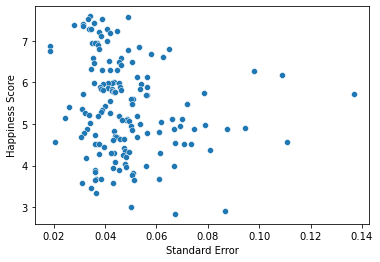

In [40]:
sns.scatterplot(x='Standard Error',y='Happiness Score',data=df)b

For Standard Error majorly distributed in the range of 0.3 to 0.6

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Happiness Score'>

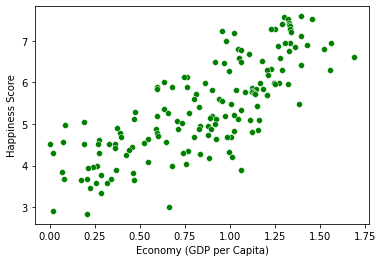

In [22]:
sns.scatterplot(x='Economy (GDP per Capita)',y='Happiness Score',data=df,color='Green')

For Economy (GDP per Capita) majorly distributed in the range of 0.25 to 1.3

<AxesSubplot:xlabel='Family', ylabel='Happiness Score'>

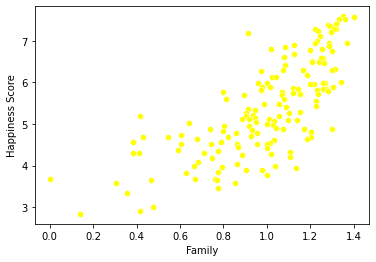

In [21]:
sns.scatterplot(x='Family',y='Happiness Score',data=df,color='Yellow')

For Family majorly distributed in the range of 0.6 to 1.4

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Happiness Score'>

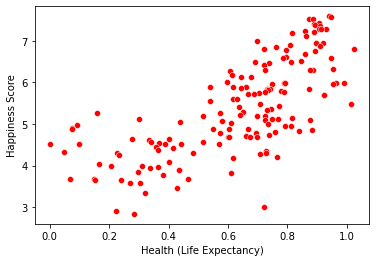

In [20]:
sns.scatterplot(x='Health (Life Expectancy)',y='Happiness Score',data=df,color='Red')

For Health (Life Expectancy) majorly distributed in the range of 0.3 to 1

<AxesSubplot:xlabel='Freedom', ylabel='Happiness Score'>

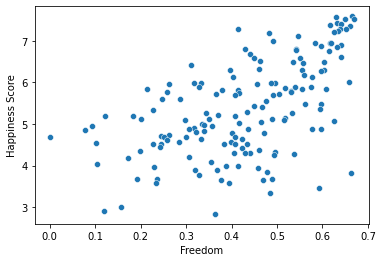

In [25]:
sns.scatterplot(x='Freedom',y='Happiness Score',data=df)

For Freedom majorly distributed in the range of 0.1 to 0.7

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Happiness Score'>

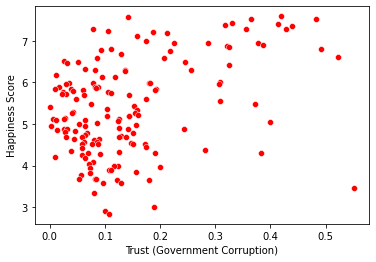

In [27]:
sns.scatterplot(x='Trust (Government Corruption)',y='Happiness Score',data=df,color='red')

For Trust (Government Corruption) is majorly distributed in the range of 0.0 to 0.2

<AxesSubplot:xlabel='Generosity', ylabel='Happiness Score'>

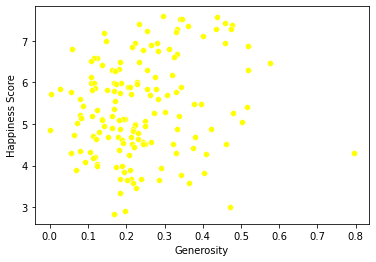

In [28]:
sns.scatterplot(x='Generosity',y='Happiness Score',data=df,color='Yellow')

For Generosity is majorly distributed in the range of 0.0 to 0.6.

<AxesSubplot:xlabel='Dystopia Residual', ylabel='Happiness Score'>

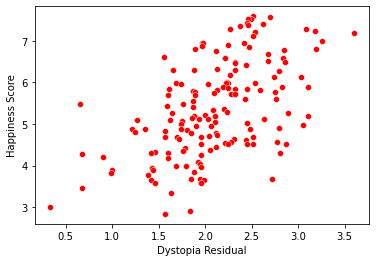

In [29]:
sns.scatterplot(x='Dystopia Residual',y='Happiness Score',data=df,color='red')

For Dystopia Residual is majorly distributed in the range of 1.25 to 3

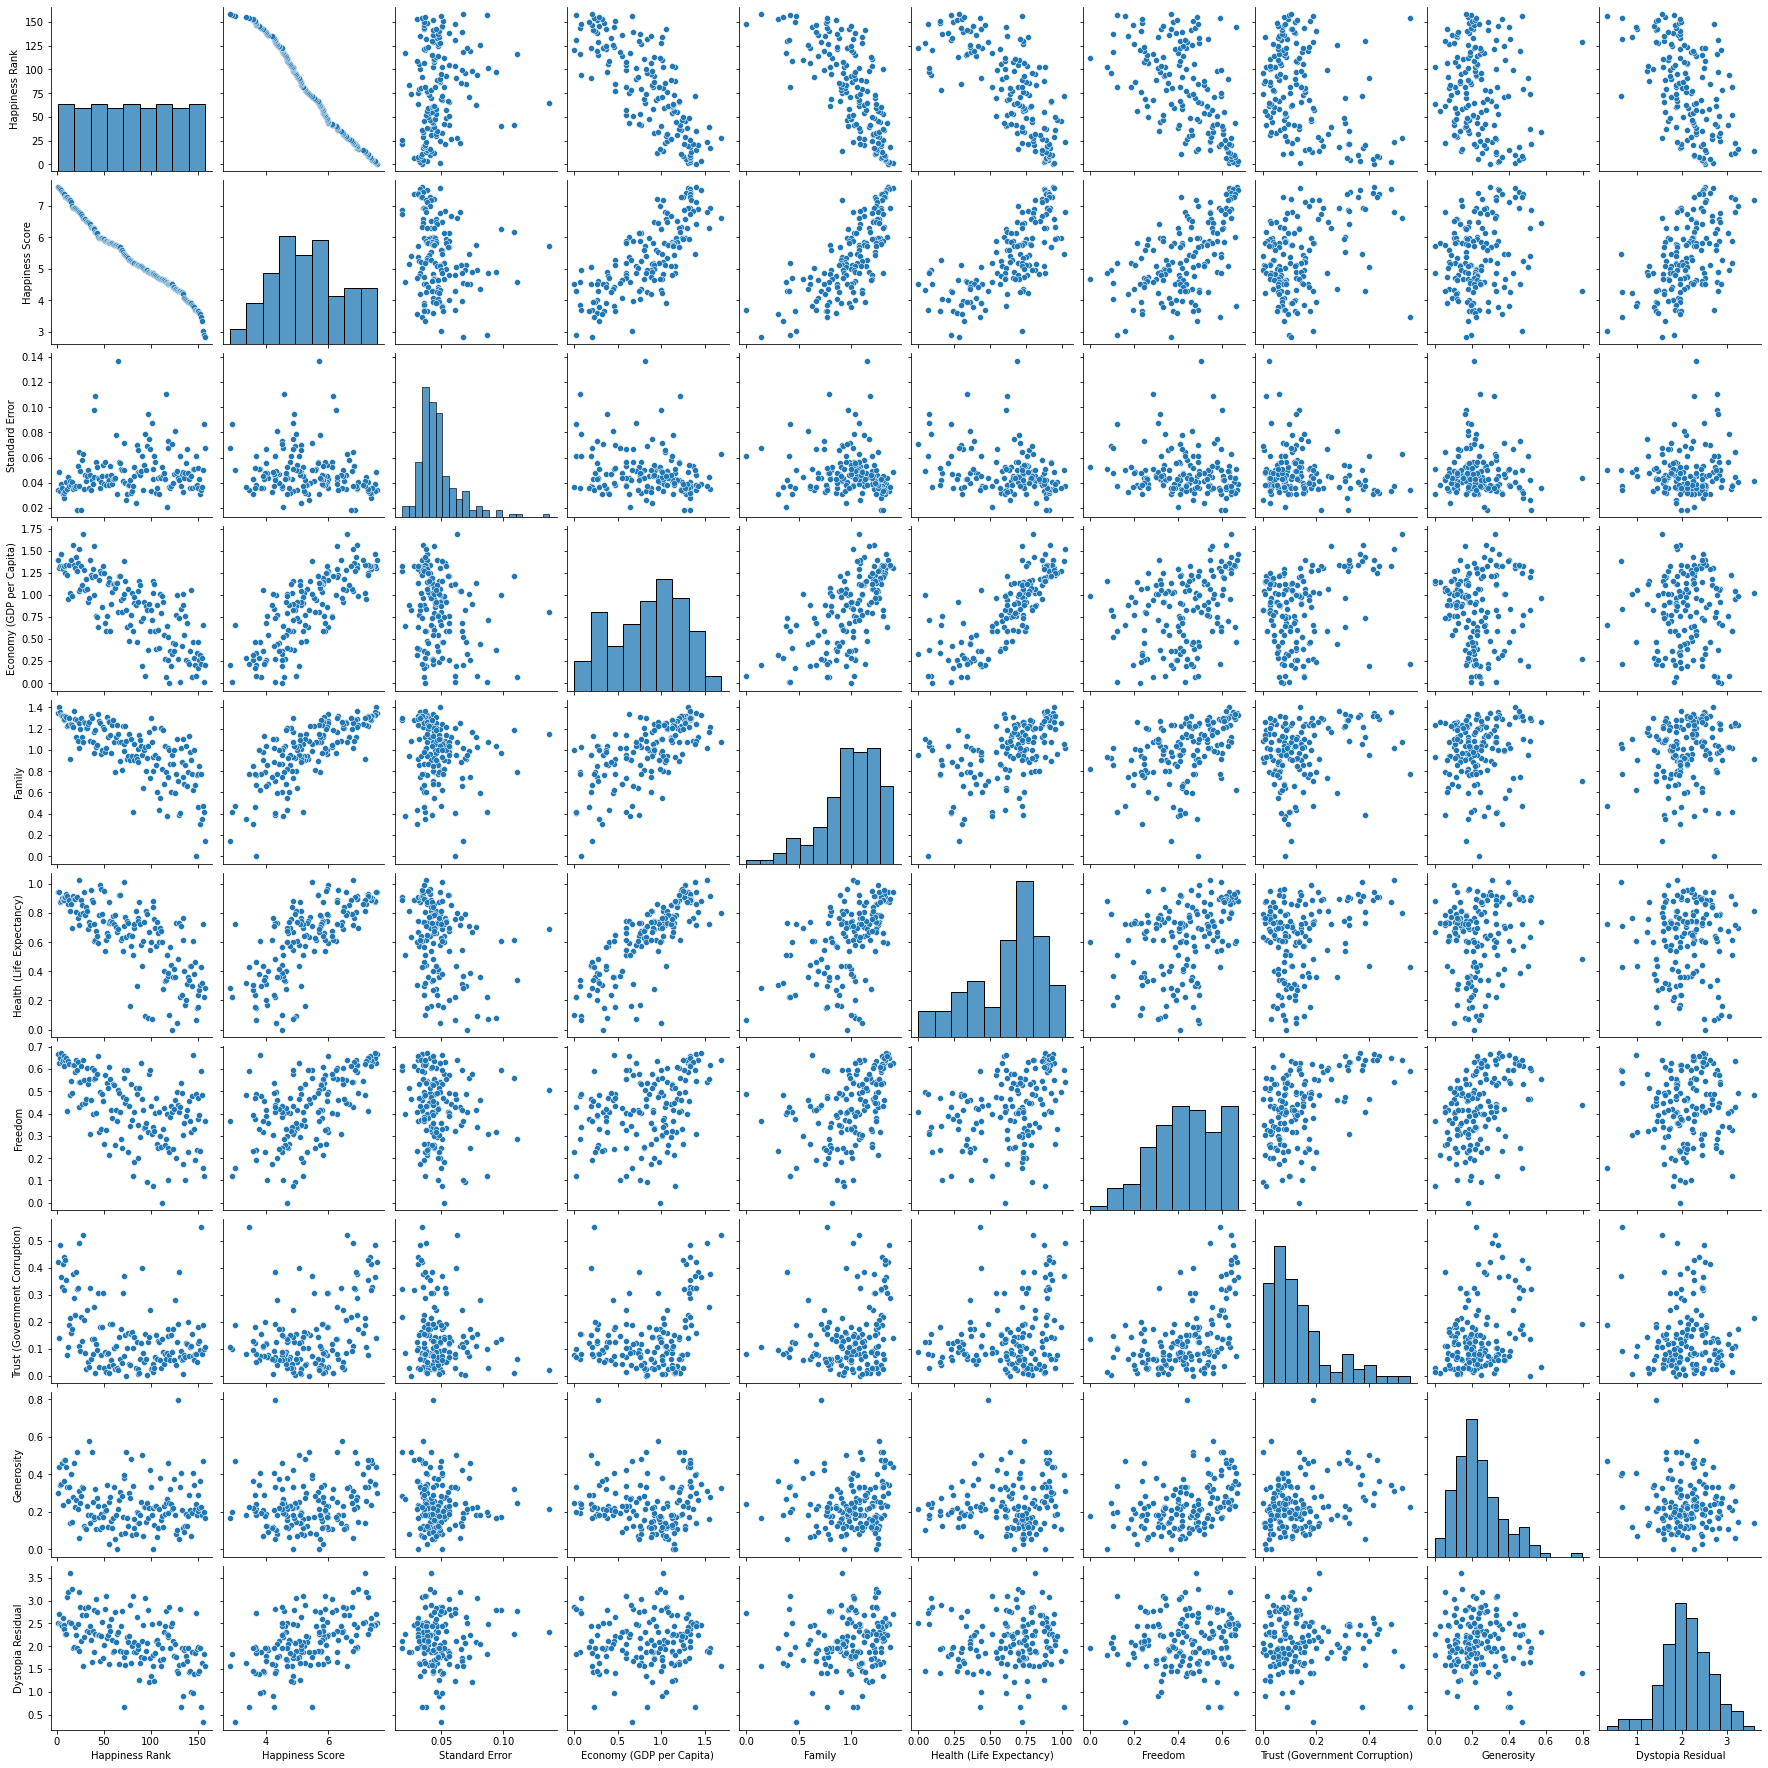

In [30]:
sns.pairplot(df)
plt.savefig('pairplot.png')
plt.show()

array([[<AxesSubplot:title={'center':'Happiness Rank'}>,
        <AxesSubplot:title={'center':'Happiness Score'}>,
        <AxesSubplot:title={'center':'Standard Error'}>],
       [<AxesSubplot:title={'center':'Economy (GDP per Capita)'}>,
        <AxesSubplot:title={'center':'Family'}>,
        <AxesSubplot:title={'center':'Health (Life Expectancy)'}>],
       [<AxesSubplot:title={'center':'Freedom'}>,
        <AxesSubplot:title={'center':'Trust (Government Corruption)'}>,
        <AxesSubplot:title={'center':'Generosity'}>],
       [<AxesSubplot:title={'center':'Dystopia Residual'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

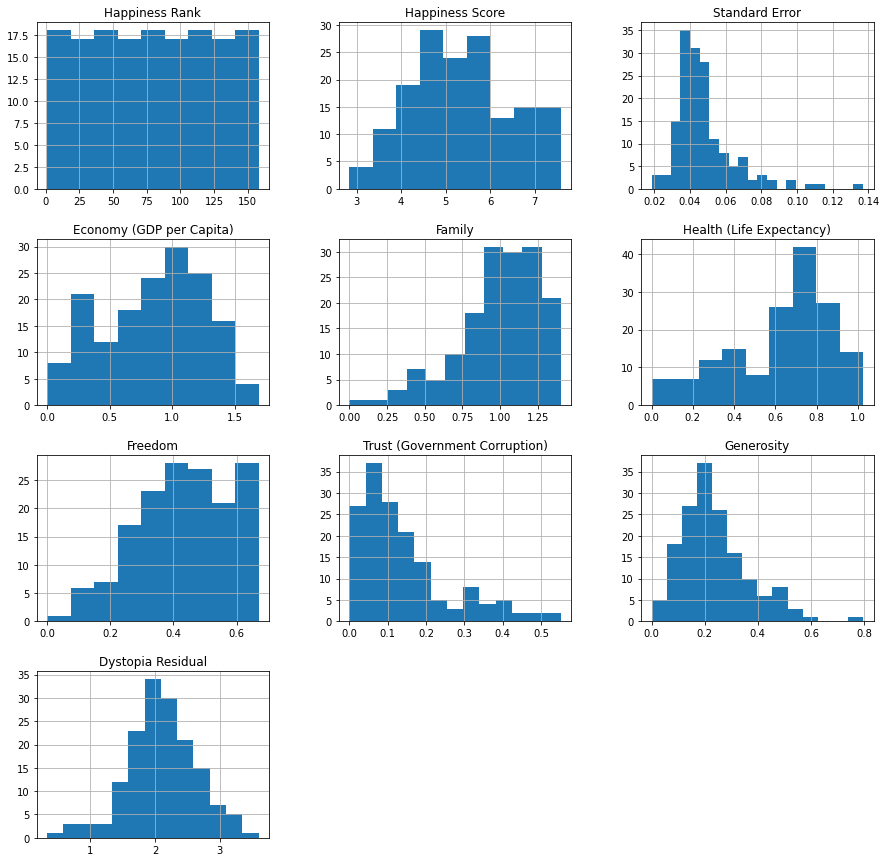

In [31]:
df.hist(bins='auto', figsize=(15,15))

In [32]:
#droping few column and make as new data set

df1=df.iloc[:,3:12]


In [33]:
df1

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
153,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [35]:
#Finding CORRELATION
df1.corr()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Score,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


In [36]:
df1.corr()['Happiness Score'].sort_values()

Standard Error                  -0.177254
Generosity                       0.180319
Trust (Government Corruption)    0.395199
Dystopia Residual                0.530474
Freedom                          0.568211
Health (Life Expectancy)         0.724200
Family                           0.740605
Economy (GDP per Capita)         0.780966
Happiness Score                  1.000000
Name: Happiness Score, dtype: float64

From Above code we can see Correlation  between Standard Error and Happiness score is in -ve so we can drop Standard Error

<AxesSubplot:>

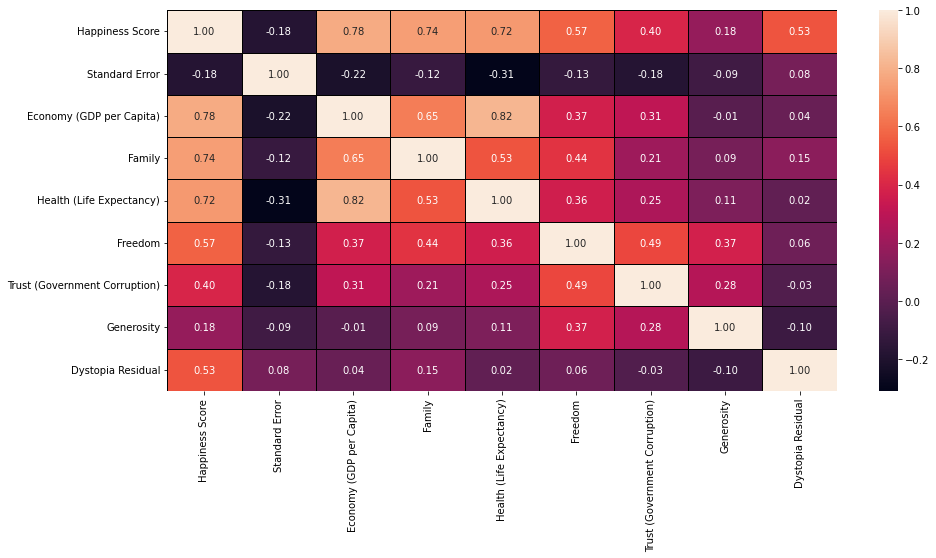

In [38]:
plt.figure(figsize=(15,7))
sns.heatmap(df1.corr(), annot=True, linewidths=0.5,linecolor="black", fmt= '.2f')

Observation:
    
-Standard Error is negatively corelated to Happiness Score  

-Generosity is only 18% correlated to Happiness Score which is not that good relation.

-Trust is 40% correlated to Happiness Score which is medium relation.

-Dystopia Residual is 50% correlated to Happiness Score which is medium relation.

-Freedom is 57% correlated to Happiness Score which is good relation

-Health is 72% correlated to Happiness Score which is good relation.

-Health is 74% correlated to Happiness Score which is good relation.

-Economy is 78% correlated to Happiness Score which is very good relation

♦Max correlation: Economy

♦Min correlation: Generosity

♦Negative correlation: Standard erro


In [40]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


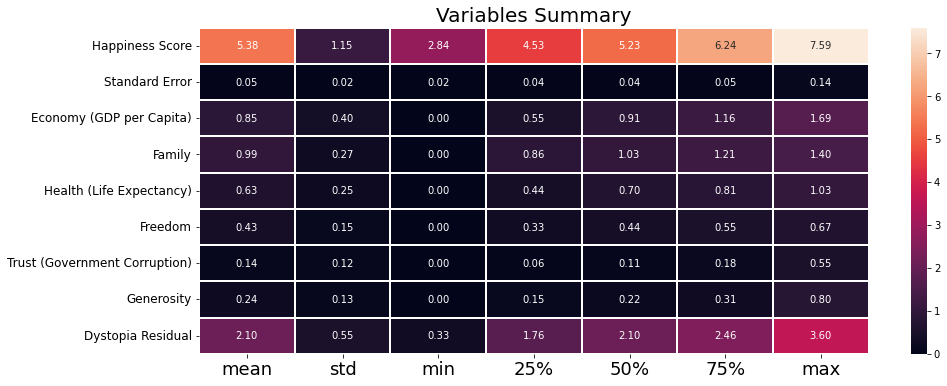

In [41]:
plt.figure(figsize=(15,6))
sns.heatmap(round(df1.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='.2f')

plt.xticks(fontsize=18)
plt.yticks(fontsize=12)

plt.title("Variables Summary",fontsize=20)
plt.show()

In [42]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Happiness Score                158 non-null    float64
 1   Standard Error                 158 non-null    float64
 2   Economy (GDP per Capita)       158 non-null    float64
 3   Family                         158 non-null    float64
 4   Health (Life Expectancy)       158 non-null    float64
 5   Freedom                        158 non-null    float64
 6   Trust (Government Corruption)  158 non-null    float64
 7   Generosity                     158 non-null    float64
 8   Dystopia Residual              158 non-null    float64
dtypes: float64(9)
memory usage: 11.2 KB


# Outliers

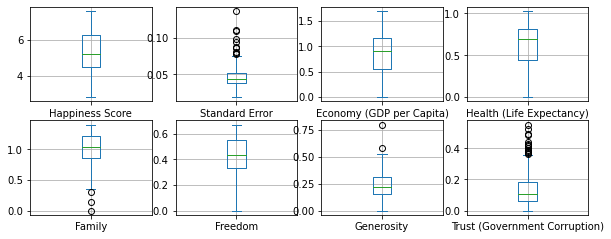

In [45]:
df[['Happiness Score','Standard Error', 'Economy (GDP per Capita)', 'Health (Life Expectancy)','Family', 'Freedom', 'Generosity', 'Trust (Government Corruption)']].plot(kind='box', subplots=True, layout=(4,4), figsize=(10,8), grid=True);

From Above Ploting we can find that outliers are present in below columns

•Standard Error

•Generosity

•Trust

•Family

In [46]:
#Skew

df1.skew()

Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

-.05=<x=<+.5 then data is normally distribute and if range cross then data is skewed from above we can understand that

Outcome of the skewness: threshold value will be +/-0.65.

Skewed columns are

Standard Error

Family

Health

Trust

Generosity

# Normal Distribution Curve:

<AxesSubplot:xlabel='Standard Error', ylabel='Density'>

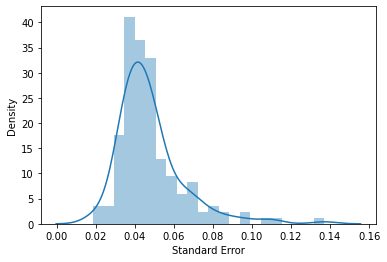

In [47]:
sns.distplot(df1['Standard Error'])

<AxesSubplot:xlabel='Family', ylabel='Density'>

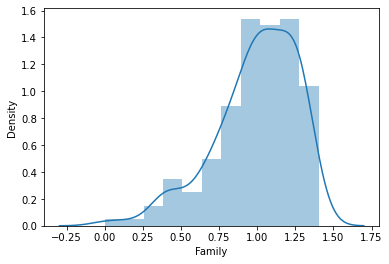

In [48]:
sns.distplot(df1['Family'])

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Density'>

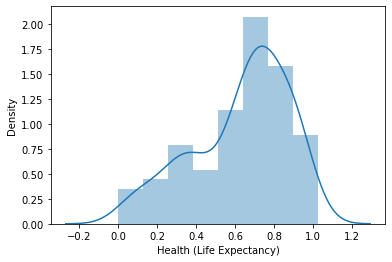

In [49]:
sns.distplot(df1['Health (Life Expectancy)'])

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Density'>

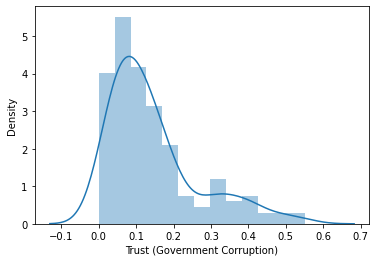

In [50]:
sns.distplot(df1['Trust (Government Corruption)'])

<AxesSubplot:xlabel='Generosity', ylabel='Density'>

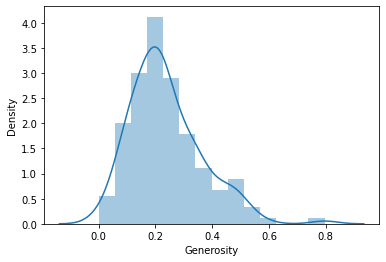

In [51]:
sns.distplot(df1['Generosity'])

In [52]:
#Droping Standard Error

df2=df1.drop('Standard Error',axis=1)

In [53]:
df2

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...
153,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


Removing Outliers

We can use IQR or Z-score

In [54]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df2))
z.shape

(158, 8)

In [55]:
threshold=3
print(np.where(z>3))

(array([ 27, 128, 147, 153, 155, 157], dtype=int64), array([5, 6, 2, 5, 7, 2], dtype=int64))


In [56]:
df_new=df2[(z<3).all(axis=1)]
print(df2.shape)
print(df_new.shape)

(158, 8)
(152, 8)


In [57]:
#Percentage data loss:

loss_percentage=(158-152)/158*100
loss_percentage

3.79746835443038

In [58]:
x=df_new.iloc[:,1:9]
y=df_new.iloc[:,-8]

In [63]:
print(x.shape)
x

(152, 7)


,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...
150,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [64]:
print(y.shape)
y

(152,)


0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
150    3.655
151    3.587
152    3.575
154    3.340
156    2.905
Name: Happiness Score, Length: 152, dtype: float64

Transforming Data to remove skewness

In [65]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [66]:
x

array([[ 1.49611068,  1.66761865,  1.48143363, ...,  1.8220699 ,
         0.65595135,  0.74453432],
       [ 1.19771756,  2.02101058,  1.52291872, ...,  0.35523024,
         1.57166845,  1.10426166],
       [ 1.27024568,  1.7401529 ,  1.06659878, ...,  1.95457489,
         0.97742359,  0.69531125],
       ...,
       [-1.35114936, -2.09149024, -1.35026722, ..., -0.16357633,
         1.13659521, -0.34441601],
       [-1.4183337 , -2.01503265, -1.30696688, ..., -0.40394411,
        -0.32359556, -0.94945138],
       [-1.91827051, -1.91154624, -1.55177307, ..., -0.11827784,
        -0.18319784, -0.57122297]])

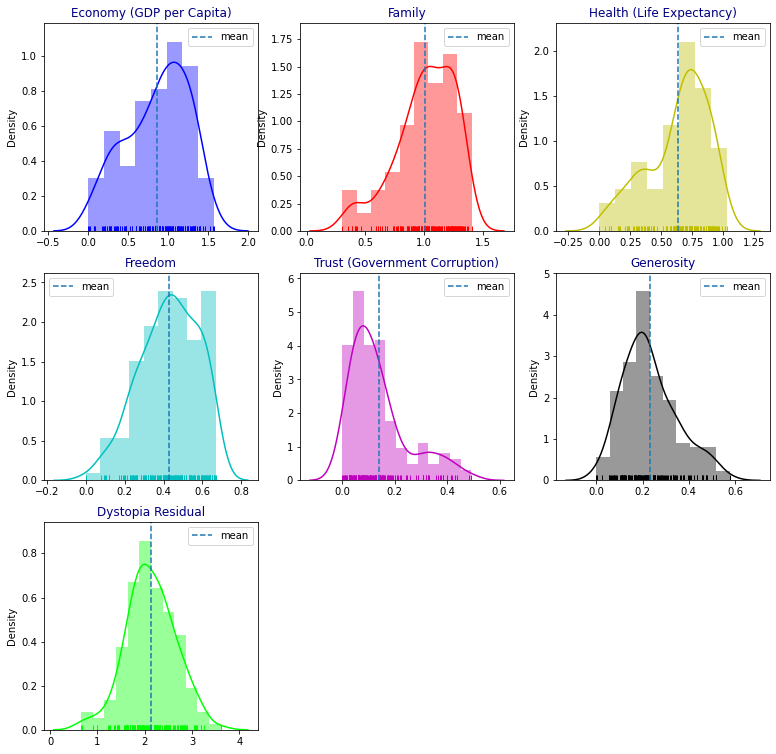

In [72]:
import itertools

cols = ['Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual']
length = len(cols)
fig = plt.figure(figsize=(13,13))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(3,3,j+1)
    ax = sns.distplot(df_new[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(df_new[i].mean(),linestyle="dashed",label="mean")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

In [75]:
#Building LinearRegression model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [76]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score

In [77]:
max_scr=0
for i in range(0,1000):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(xtrain,ytrain)
    pred_train=lr.predict(xtrain)
    pred_test=lr.predict(xtest)
    if round(r2_score(ytrain,pred_train)*100,2)==round(r2_score(ytest,pred_test)*100,2):
        print("At random state",i," The model performs very well")
        print("At random_state:-",i)
        print("Training r2_score is:-", r2_score(ytrain,pred_train)*100)
        print("Testing r2_score is:-", r2_score(ytest,pred_test)*100)

At random state 35  The model performs very well
At random_state:- 35
Training r2_score is:- 99.41941493759124
Testing r2_score is:- 99.41805428234099
At random state 84  The model performs very well
At random_state:- 84
Training r2_score is:- 99.42535555613838
Testing r2_score is:- 99.42580861284178
At random state 95  The model performs very well
At random_state:- 95
Training r2_score is:- 99.41878844708879
Testing r2_score is:- 99.4245221915696
At random state 213  The model performs very well
At random_state:- 213
Training r2_score is:- 99.41702291183927
Testing r2_score is:- 99.42000214077392
At random state 251  The model performs very well
At random_state:- 251
Training r2_score is:- 99.42334166617816
Testing r2_score is:- 99.4229933875751
At random state 312  The model performs very well
At random_state:- 312
Training r2_score is:- 99.41502022387795
Testing r2_score is:- 99.41676342164256
At random state 451  The model performs very well
At random_state:- 451
Training r2_score 

In [78]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.20,random_state=84)

In [79]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)
lr.score(xtrain,ytrain)

pred_test=lr.predict(xtest)

from sklearn.metrics import accuracy_score
r2_score(ytest,pred_test)*100

99.42580861284178

In [85]:

print('Mean Absolute Error:',mean_absolute_error(ytest,pred_test))
print('Mean Squared Error:',mean_squared_error(ytest,pred_test))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_test)))

Mean Absolute Error: 0.06884285756636346
Mean Squared Error: 0.007680351228077188
Root Mean Square Error: 0.08763761308979831


In [90]:
#building RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion':['friedman_mse', 'mae'],'n_estimators':[100,200,300]}
rf = RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'criterion': 'mae', 'n_estimators': 300}


In [91]:
rf = RandomForestRegressor(criterion='mae',n_estimators=200)
rf.fit(xtrain,ytrain)
rf.score(xtrain,ytrain)
pred_random = rf.predict(xtest)

rfs = r2_score(ytest,pred_random)
print('R2 Score:',rfs*100)

rfscore = cross_val_score(rf,x,y,cv=4)
rfc = rfscore.mean() 
print('Cross Val Score:',rfc*100)

R2 Score: 93.87912122161009
Cross Val Score: -380.9563636695595


The best model is Linear Regressor. Since the difference between the percentage score of cross validation and r2_score is optimum

# Conclusion:

In [86]:
actual_vs_pred = pd.DataFrame({'Actual': ytest, 'Predicted': pred_test})
actual_vs_pred

,Actual,Predicted
8,7.286,7.204750
29,6.574,6.597552
46,5.984,6.072212
139,3.956,3.955053
42,6.123,6.047559
41,6.130,6.044381
137,3.995,4.044063
36,6.302,6.356158
107,4.715,4.645750
119,4.517,4.690018
